In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np

from plancklens.utils import cli

# retina matplotlib magic

In [2]:
keyB = "NL Born"
keyBg = "NL Born Gauss"
keyBr = "NL Born Rand"
keyBL = "NL Born Lognormal"
keyBLr = "NL Born Lognormal Rand"


keyPB = "NL Post-Born"
keyPBr = "NL Post-Born Rand"
keyPBg = "NL Post-Born Gauss"

keyW = "NL Websky Born"
keyWr = "NL Websky Born Rand"
keyWg = "NL Websky Born Gauss"


In [3]:
# cases = [SOB.casolog, SOB.casorandlog, SOB.casogauss]
# keys = [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]

# cases = [SOB.casologdoubleskew, SOB.casorandlogdoubleskew, SOB.casogauss]
# keys = [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]

In [4]:
mean = lambda x: np.mean(x, axis=0)

In [5]:
outputdir = pathlib.Path(os.environ['SCRATCH'])/"n32spectra"

In [25]:
version, studycase = "bhnew", "websky"
iters = np.arange(0, 2)
iters

array([0, 1])

In [8]:
iMin, iMax = 0, 0

ranksnumbers = 1
totpertime = 1
delta = totpertime #int(totpertime/ranksnumbers)


imin = 0
imax = delta+imin-1

while imax <= iMax:
    print("Read", outputdir/f"results_{version}_{studycase}_{imin}_{imax}.npy")
    results = np.load(outputdir/f"results_{version}_{studycase}_{imin}_{imax}.npy", allow_pickle = True).take(0)
    
    if imin == 0:
        auto_in = results["auto_in"]
        crosses_qe = results["crosses_qe"]
        auto_qe = results["auto_qe"]
        
        crosses_dict = results["crosses_dict"]
        autos_dict = results["autos_dict"]
        
        autos_in_dict = results["autos_in_dict"]
        
        auto_in_born_gaussian = results["auto_in_born_gaussian"]
        crosses_born_gaussian = results["crosses_born_gaussian"]
    else:
        auto_in = {k: np.vstack((np.array(el), np.array(results["auto_in"][k]))) for k, el in auto_in.items()}
        crosses_qe = {k: np.vstack((np.array(el), np.array(results["crosses_qe"][k]))) for k, el in crosses_qe.items()}
        auto_qe = {k: np.vstack((np.array(el), np.array(results["auto_qe"][k]))) for k, el in auto_qe.items()}
        
        crosses_dict = {k: np.vstack((np.array(el), np.array(results["crosses_dict"][k]))) for k, el in crosses_dict.items()}
        autos_dict = {k: np.vstack((np.array(el), np.array(results["autos_dict"][k]))) for k, el in autos_dict.items()}
        autos_in_dict = {k: np.vstack((np.array(el), np.array(results["autos_in_dict"][k]))) for k, el in autos_in_dict.items()}
        
        auto_in_born_gaussian = np.vstack((auto_in_born_gaussian, results["auto_in_born_gaussian"]))
        crosses_born_gaussian = np.vstack((crosses_born_gaussian, results["crosses_born_gaussian"]))
        
        
    imin = imax+1
    imax += delta
        

Read /Users/omard/Downloads/SCRATCHFOLDER/n32spectra/results_bhnew_websky_0_0.npy


In [9]:
imax

1

In [10]:
allkeys = list(crosses_dict.keys())
cases = allkeys

if studycase == "lognormal":
    keys = [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]
elif studycase == "lognormaldoubleskew":
    keys = [keyBL, keyBLr, keyBg]#, keyBLr, keyBL]
elif studycase == "born":
    keys = [keyB, keyBr, keyBg]
elif studycase == "postborn":
    keys = [keyPB, keyPBr, keyBg]   
elif studycase == "websky":
    keys = [keyW, keyWr, keyWg] 

cases = allkeys


SOdict = {k: v for k, v in zip(cases, keys)}

In [11]:
cases

['websky', 'webskyrand', 'webskygauss']

In [12]:
allkeys

['websky', 'webskyrand', 'webskygauss']

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/3622715421.py:7: RuntimeWarning: invalid value encountered in divide
  mean(auto_in[key_]) / mean(auto_in[cases[0]]),


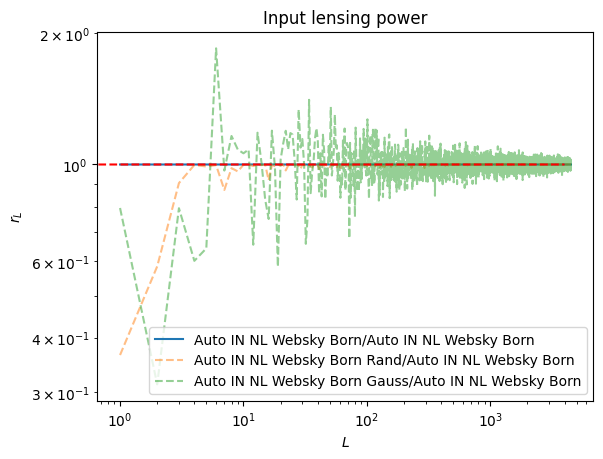

In [13]:
plt.title("Input lensing power")

for key_ in allkeys:
    alpha = 0.5 if key_ != cases[0] else 1.0
    ls = "--" if key_ != cases[0] else "-"
    plt.loglog(
        mean(auto_in[key_]) / mean(auto_in[cases[0]]),
        label=f"Auto IN {SOdict[key_]}/Auto IN {SOdict[cases[0]]}",
        alpha=alpha,
        ls=ls,
    )

# plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
# plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')

plt.loglog(np.arange(0, 4000), np.ones(4000), "r--")

# for k, auto in auto_in.items():
#    plt.loglog(mean(auto)/pp[:len(mean(auto))], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


plt.legend()

plt.xlabel(r"$L$")
plt.ylabel(r"$r_L$")

plt.savefig(f"figures/input_lensing_power_{cases[0]}.png", dpi = 200)

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/1865446667.py:5: RuntimeWarning: invalid value encountered in divide
  plt.loglog(mean(autoin) / mean(crosses_qe[k]), label=f"Auto IN/CROSS IN {k}")


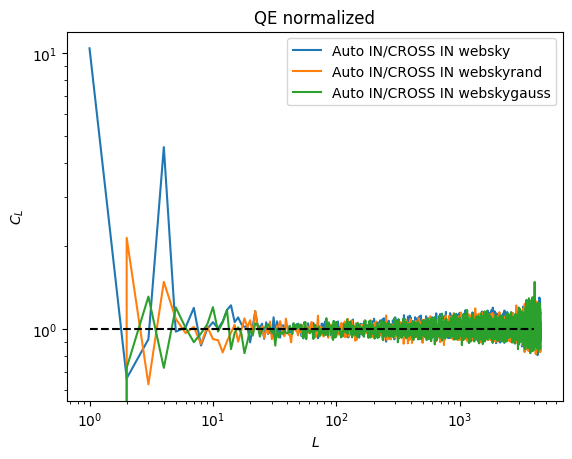

In [14]:
plt.title("QE normalized")

for k, autoin in auto_in.items():
    # plt.loglog(mean(crosses_dict[k]), label = f'Cross {k}')
    plt.loglog(mean(autoin) / mean(crosses_qe[k]), label=f"Auto IN/CROSS IN {k}")
plt.hlines(1, 1, 4000, ls="--", color="black")
plt.legend()

plt.xlabel(r"$L$")
plt.ylabel(r"$C_L$")

plt.savefig(f"figures/qe_norm_power_{cases[0]}.png", dpi = 200)

In [15]:
rhos = {
    k: mean(cross) / np.sqrt(mean(auto_qe[k]) * mean(auto_in[k]))
    for k, cross in crosses_qe.items()
}

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/2772977675.py:2: RuntimeWarning: invalid value encountered in divide
  k: mean(cross) / np.sqrt(mean(auto_qe[k]) * mean(auto_in[k]))


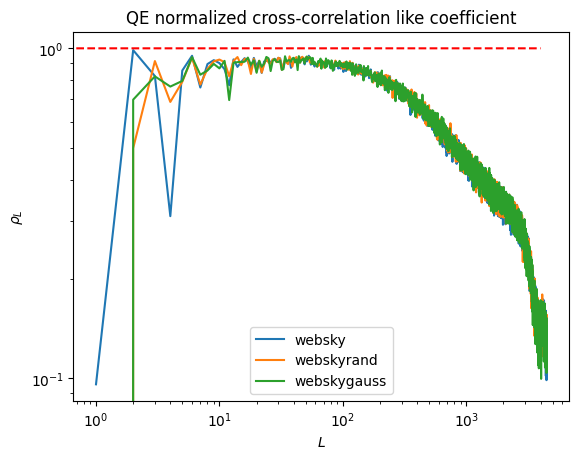

In [16]:
plt.title("QE normalized cross-correlation like coefficient")

for k, rho in rhos.items():
    plt.loglog(rho, label=f"{k}")

plt.loglog(np.arange(0, 4000), np.ones(4000), "r--")

plt.xlabel(r"$L$")
plt.ylabel(r"$\rho_L$")

plt.legend()

plt.savefig(f"figures/qe_cross_corr_coeff_{cases[0]}.png", dpi = 200)

## Iterative Reconstruction

In [19]:
rho_iters_dict = {}
    
for k in crosses_dict.keys():
    cs_ = crosses_dict[k]
    as_ = autos_dict[k]
    auto_in_temp = auto_in[k]

    rhos_list = mean(cs_) / np.sqrt(mean(as_) * mean(auto_in_temp))
    rho_iters_dict[k] = rhos_list

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/3173786182.py:8: RuntimeWarning: invalid value encountered in divide
  rhos_list = mean(cs_) / np.sqrt(mean(as_) * mean(auto_in_temp))


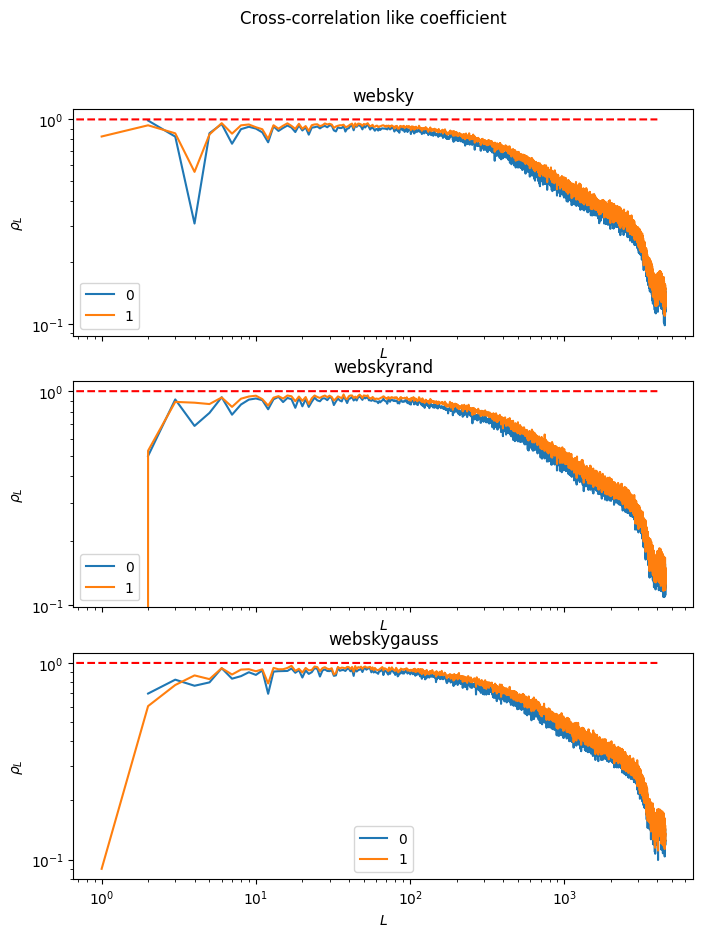

In [20]:
fig, ax = plt.subplots(nrows = len(cases), figsize = (8, 10), sharex = True)
fig.suptitle(f"Cross-correlation like coefficient")
ii = 0 
for k, rhos in rho_iters_dict.items():
    ax[ii].set_title(k)
    [ax[ii].loglog(rho, label=f"{i}") for i, rho in enumerate(rhos)]
    ax[ii].set_xlabel(r"$L$")
    ax[ii].set_ylabel(r"$\rho_L$")
    ax[ii].legend()
    ax[ii].loglog(np.arange(0, 4000), np.ones(4000), "r--")
    ii += 1
plt.savefig(f"figures/cross_corr_coeff_iters{cases[0]}.png", dpi = 200)

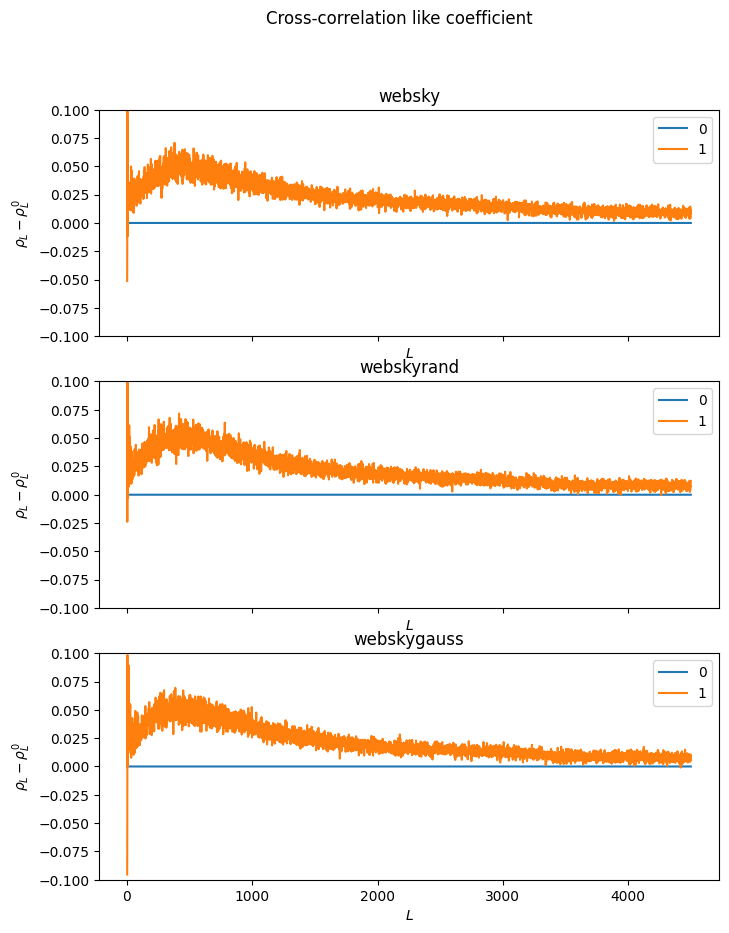

In [21]:
fig, ax = plt.subplots(nrows = len(cases), figsize = (8, 10), sharex = True)
fig.suptitle(f"Cross-correlation like coefficient")
ii = 0 
for k, rhos in rho_iters_dict.items():
    ax[ii].set_title(k)
    [ax[ii].plot(rho-rhos[0], label=f"{i}") for i, rho in enumerate(rhos)]
    ax[ii].set_xlabel(r"$L$")
    ax[ii].set_ylabel(r"$\rho_L-\rho^0_L$")
    ax[ii].legend()
    ax[ii].set_ylim(-0.1, 0.1)
    ii += 1
plt.savefig(f"figures/sub_cross_corr_coeff_iters{cases[0]}.png", dpi = 200)

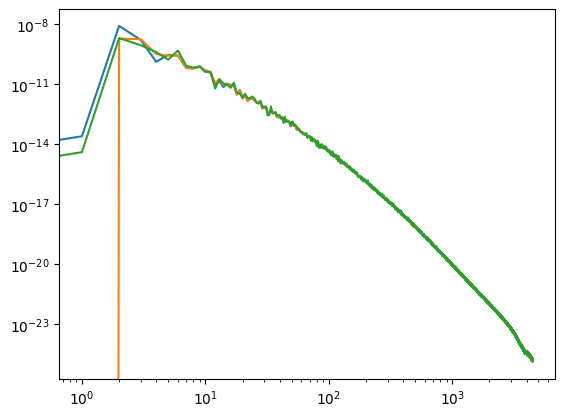

In [22]:
for k, c in crosses_dict.items():
    plt.loglog(mean(np.nan_to_num(c)[0]))

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/924246431.py:7: RuntimeWarning: invalid value encountered in divide
  np.swapaxes(crosses_born_gaussian, 0, 1) / auto_in_born_gaussian, axis=1
/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/924246431.py:6: RuntimeWarning: Mean of empty slice
  norms_gauss_born_gaussian = np.nanmean(


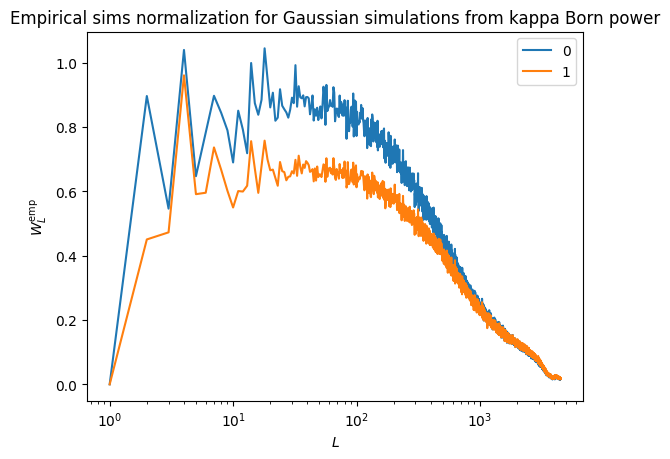

In [26]:
norms_gauss_born_gaussian = {}

empirical_noises = {}

# always assume in this notebook that you have all iterations from 0 to itmax in iters
norms_gauss_born_gaussian = np.nanmean(
    np.swapaxes(crosses_born_gaussian, 0, 1) / auto_in_born_gaussian, axis=1
)
for itr in iters:
    plt.plot(norms_gauss_born_gaussian[itr], label=itr)
    empirical_noises[itr] = auto_in_born_gaussian.mean(axis = 0)*(cli(norms_gauss_born_gaussian[itr]) - 1)
plt.legend()
plt.xscale("log")
plt.ylabel(r"$W_L^{\rm{emp}}$")
plt.xlabel("$L$")
plt.title("Empirical sims normalization for Gaussian simulations from kappa Born power")
plt.savefig(f"figures/empirical_norm{cases[0]}.png", dpi = 200)

In [27]:
csignalgauss = auto_in_born_gaussian.mean(axis = 0)

In [28]:
lerrs = np.arange(0, len(csignalgauss))
delta_l = lerrs[1]-lerrs[0]
fsky = 0.4

In [29]:
1/(2*lerrs*delta_l*fsky)

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/747135921.py:1: RuntimeWarning: divide by zero encountered in divide
  1/(2*lerrs*delta_l*fsky)


array([           inf, 1.25000000e+00, 6.25000000e-01, ...,
       2.77901289e-04, 2.77839520e-04, 2.77777778e-04])

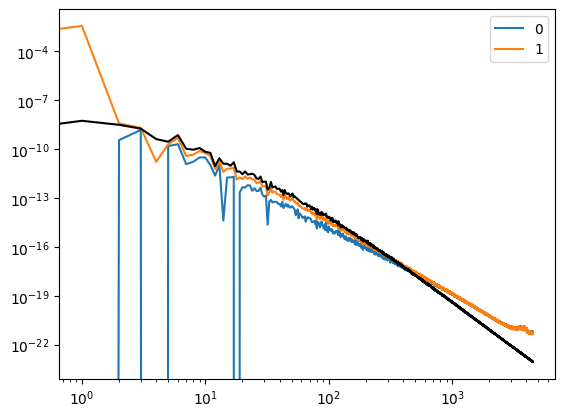

In [30]:
errbars = {}
for itr in iters:
    noise = empirical_noises[itr]
    plt.loglog(noise, label = itr)
    errbars[itr] = np.sqrt(1/((2*lerrs+1)*delta_l*fsky)*(csignalgauss**2+(csignalgauss+noise)*csignalgauss))
plt.plot(csignalgauss, color = "black")
plt.plot()
plt.legend()

In [31]:
#csignalgauss[sel]/err[sel]

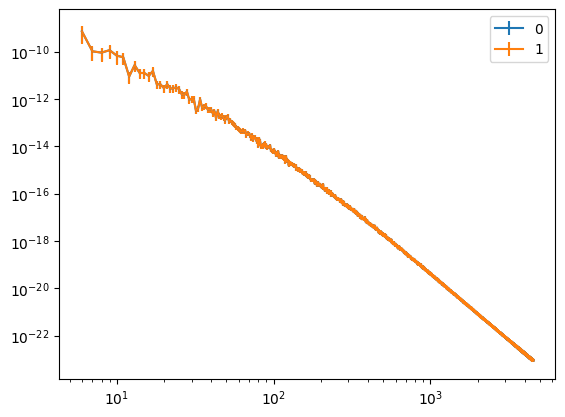

In [32]:
for itr in [0, 1]:
    err = errbars[itr]
    lerr = np.arange(0, len(err)) 
    sel = lerr > 5
    plt.errorbar(lerr[sel], csignalgauss[sel], err[sel], label = itr)
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [33]:
"""
#norms_gauss_born_gaussian = {}

#always assume in this notebook that you have all iterations from 0 to itmax in iters
#norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1), axis = 1)
for itr in iters:
    p = plt.plot(norms_gauss_born_gaussian[itr], label = itr)
    plt.plot(wfs_th[itr], ls = '--', color = p[0].get_color())
plt.legend()
plt.xscale('log')
plt.ylabel(r'$W_L$')
plt.xlabel('$L$')
plt.title('Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')
"""

"\n#norms_gauss_born_gaussian = {}\n\n#always assume in this notebook that you have all iterations from 0 to itmax in iters\n#norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1), axis = 1)\nfor itr in iters:\n    p = plt.plot(norms_gauss_born_gaussian[itr], label = itr)\n    plt.plot(wfs_th[itr], ls = '--', color = p[0].get_color())\nplt.legend()\nplt.xscale('log')\nplt.ylabel(r'$W_L$')\nplt.xlabel('$L$')\nplt.title('Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')\n"

## Correcting with empirical Gaussian kappa power Born derived normalization

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/1934069117.py:9: RuntimeWarning: invalid value encountered in divide
  ax[ii].plot(cross_element / norms_gauss_born_gaussian[it] / autoin_, label=it)


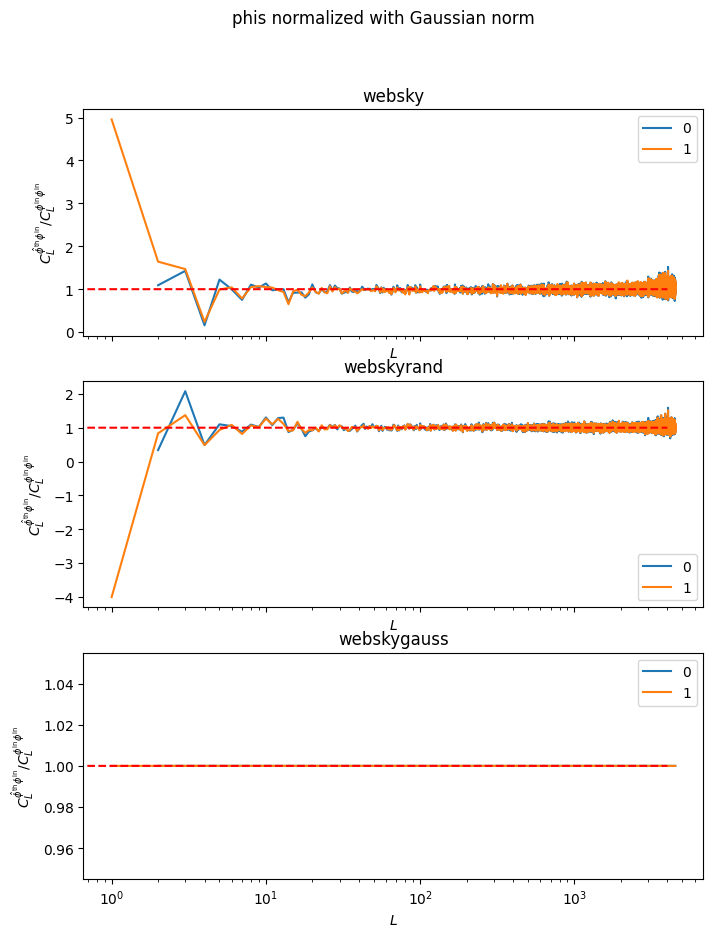

In [34]:
fig, ax = plt.subplots(nrows = len(cases), figsize = (8, 10), sharex = True)
fig.suptitle(f"phis normalized with Gaussian norm")
ii = 0 
for k, cross_ in crosses_dict.items():
    autoin_ = mean(autos_in_dict[k])
    ax[ii].set_title(f"{k}")
    cross = mean(cross_)
    for it, cross_element in enumerate(cross):
        ax[ii].plot(cross_element / norms_gauss_born_gaussian[it] / autoin_, label=it)
    ax[ii].plot(np.arange(0, 4000), np.ones(4000), "r--")
    ax[ii].set_xlabel(r"$L$")
    ax[ii].set_ylabel(
        r"$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$"
    )
    ax[ii].set_xscale("log")
    ax[ii].legend()
    ii += 1
plt.savefig(f"figures/normalized_phis_{cases[0]}.png", dpi = 200)

In [35]:
import scipy
from scipy import signal


def bin_theory(l, lcl, bin_edges):
    sums = scipy.stats.binned_statistic(l, l, statistic="sum", bins=bin_edges)
    cl = scipy.stats.binned_statistic(l, lcl, statistic="sum", bins=bin_edges)
    cl = cl[0] / sums[0]
    return cl


bin_edges = np.arange(10, 4000, 200)

In [36]:
std = lambda x: np.std(x, axis=0)

In [37]:
autos_in_dict.keys()

dict_keys(['websky', 'webskyrand', 'webskygauss'])

In [38]:
cases

['websky', 'webskyrand', 'webskygauss']

In [39]:
# CONVENTION: cases[0] has the non-Gaussian signal

In [40]:
Nsims = iMax-iMin
Nsims

0

In [41]:
title = cases[0]

In [42]:
studycase

'websky'

In [43]:
plt.rc('text', usetex=False)

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/2854596282.py:24: RuntimeWarning: invalid value encountered in divide
  value = process((A - B) / norms_gauss_born_gaussian[it] / autoin_)
/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_58798/2854596282.py:25: RuntimeWarning: invalid value encountered in divide
  svalue = process((sA_B) / norms_gauss_born_gaussian[it] / autoin_)


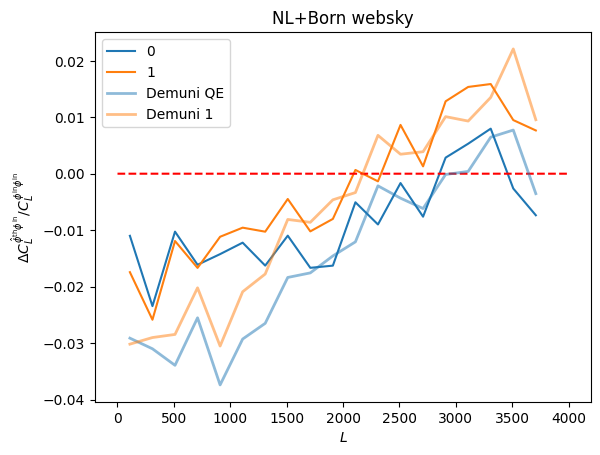

In [47]:
# plt.figure(figsize = (3, 6))
autoin_ = mean(autos_in_dict[cases[0]])
autoin_ = mean(autos_in_dict[cases[1]])
plt.title(f"NL+Born {title}")

cross_A = mean(crosses_dict[cases[0]])
cross_B = mean(crosses_dict[cases[1]])

std_A_B = std(crosses_dict[cases[0]] - crosses_dict[cases[1]])

directory = "/users/odarwish/n32plots/data/tt/"

colors = []

for it, cross_elements in enumerate(zip(cross_A, cross_B, std_A_B)):
    A, B, sA_B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, 3)  # window size used for filtering
    # process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_ * x, bin_edges)
    elbin = (bin_edges[:-1] + bin_edges[1:]) / 2

    value = process((A - B) / norms_gauss_born_gaussian[it] / autoin_)
    svalue = process((sA_B) / norms_gauss_born_gaussian[it] / autoin_)
    
    if it == 0:
        valuebase = value
        value0 = value
    else:
        valuebase = np.c_[valuebase, value]
        
    
    #np.savetxt(f"{directory}binned_tt_n32_cross_{studycase}_{it}.txt", np.c_[elbin, value, svalue/np.sqrt(Nsims)])
        
    #plt.fill_between(elbin, value-svalue/np.sqrt(Nsims), value+svalue/np.sqrt(Nsims), alpha = 0.4)
    #if it == 0:
    p = plt.plot(elbin, value, label=it)
    colors += [p[0].get_color()]

np.savetxt(f"cross_n32_{cases[0]}_{version}.txt", np.c_[elbin, valuebase])

plt.plot(np.arange(0, 4000), np.zeros(4000), "r--")
plt.xlabel(r"$L$")
plt.ylabel(
    r"$\Delta C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$"
)

l, cl, _ = np.loadtxt("/Users/omard/Documents/projects/n32plots/data/tt/binned_tt_n32_cross_born_0.txt", unpack = True)
plt.plot(l, cl, label = "Demuni QE", color = colors[0], alpha = 0.5, lw = 2)

l, cl, _ = np.loadtxt("/Users/omard/Documents/projects/n32plots/data/tt/binned_tt_n32_cross_born_1.txt", unpack = True)
plt.plot(l, cl, label = "Demuni 1", color = colors[1], alpha = 0.5, lw = 2)

l, cl, _ = np.loadtxt("/Users/omard/Documents/projects/n32plots/data/tt/binned_tt_n32_cross_born_2.txt", unpack = True)
#plt.plot(l, cl, label = "Demuni 2", color = colors[1], alpha = 0.5, lw = 2)


# plt.xscale('log')
#plt.ylim(-0.1, 0.1)
plt.legend()
plt.savefig(f"figures/n32_cross_{cases[0]}.png", dpi = 200, bbox_inches = "tight")

/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_93921/2319889927.py:18: RuntimeWarning: invalid value encountered in divide
  value = process((A - B) / norms_gauss_born_gaussian[it] ** 2 / autoin_)
/var/folders/5s/mpby42n15_ng7rv494cv19tw0000gn/T/ipykernel_93921/2319889927.py:19: RuntimeWarning: invalid value encountered in divide
  svalue = process((sA_B) / norms_gauss_born_gaussian[it] ** 2 / autoin_)


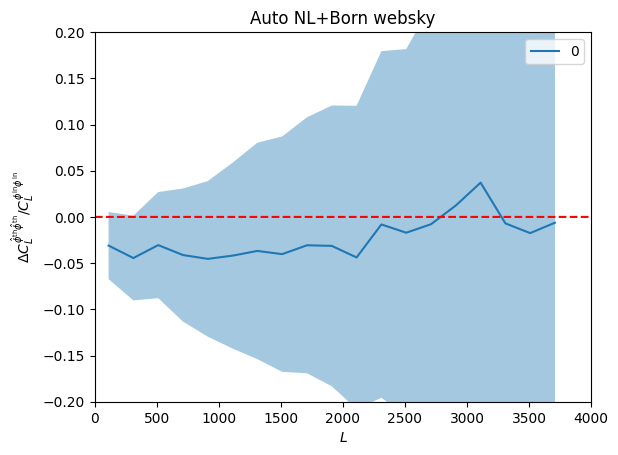

In [46]:
autoin_ = mean(autos_in_dict[cases[0]])
plt.title(f"Auto NL+Born {title}")

cross_A = mean(autos_dict[cases[0]])
cross_B = mean(autos_dict[cases[1]])

std_A_B = std(autos_dict[cases[0]] - crosses_dict[cases[1]])

for it, cross_elements in enumerate(zip(cross_A, cross_B, std_A_B)):
    A, B, sA_B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, 3)  # window size used for filtering
    process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_ * x, bin_edges)
    elbin = (bin_edges[:-1] + bin_edges[1:]) / 2

    value = process((A - B) / norms_gauss_born_gaussian[it] ** 2 / autoin_)
    svalue = process((sA_B) / norms_gauss_born_gaussian[it] ** 2 / autoin_)
    plt.fill_between(elbin, value-svalue/np.sqrt(Nsims), value+svalue/np.sqrt(Nsims), alpha = 0.4)
    plt.plot(elbin, value, label=it)
    
    #np.savetxt(f"{directory}binned_tt_n32_auto_{studycase}_{it}.txt", np.c_[elbin, value, svalue/np.sqrt(Nsims)])

    if it == 0:
        valuebase = value
    else:
        valuebase = np.c_[valuebase, value]

np.savetxt(f"auto_n32_{cases[0]}_{version}.txt", np.c_[elbin, valuebase])
plt.plot(np.arange(0, 4000), np.zeros(4000), "r--")
plt.xlabel(r"$L$")
plt.ylabel(
    r"$\Delta C^{\hat{\phi}^{\rm{th}}\hat{\phi}^{\rm{th}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$"
)
# plt.xscale('log')
plt.ylim(-0.2, 0.2)
plt.xlim(0, 4000)

plt.legend()
plt.savefig(f"figures/n32_auto_{cases[0]}.png", dpi = 200, bbox_inches = "tight")
plt.show()

### Comparing Sims

In [57]:
cases_to_compare = [SOB.casostd, SOB.casolog, SOB.casologdoubleskew]

NameError: name 'SOB' is not defined

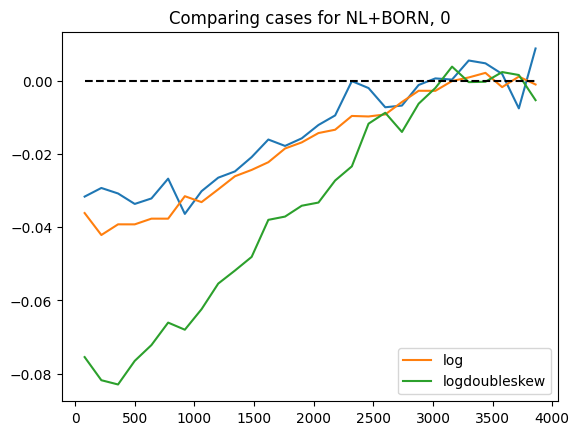

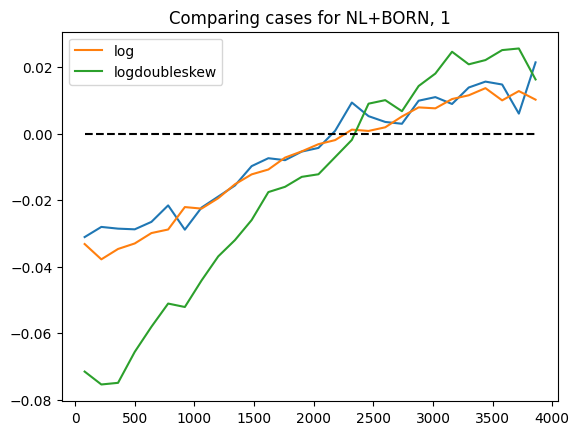

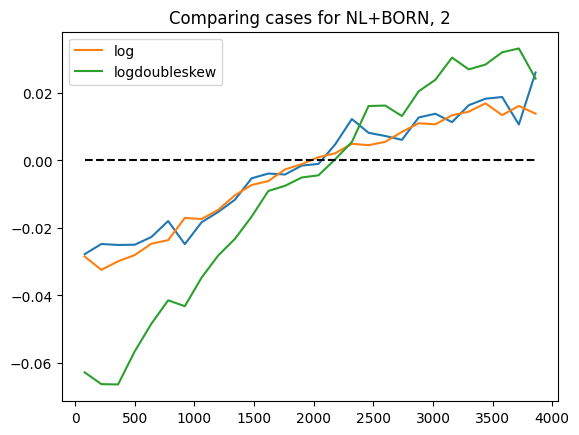

In [121]:
for iteration in iters:
    plt.title(f"Comparing cases for NL+BORN, {iteration}")
    for c_ in cases_to_compare:
        data = np.loadtxt(f"cross_n32_{c_}.txt")
        elbin, valuebase = data[:, 0], data[:, iteration + 1]
        plt.plot(elbin, valuebase, label=c_)
    plt.plot(elbin, np.zeros(len(elbin)), "k--")
    plt.legend()
    plt.show()

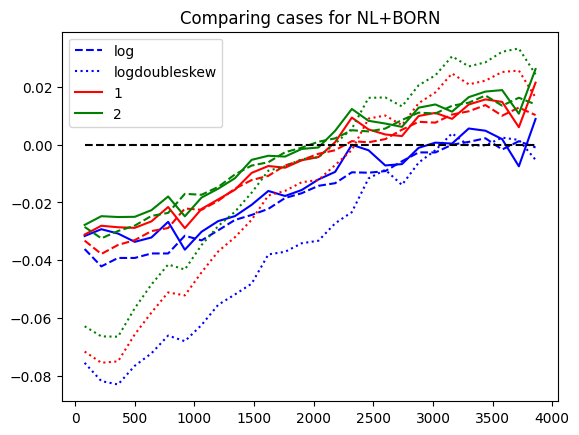

In [124]:
colors = ["blue", "red", "green"]
styles = ["-", "--", ":"]

for iteration in iters:
    plt.title(f"Comparing cases for NL+BORN")
    for c_, style in zip(cases_to_compare, styles):
        data = np.loadtxt(f"cross_n32_{c_}.txt")
        elbin, valuebase = data[:, 0], data[:, iteration + 1]
        plt.plot(
            elbin,
            valuebase,
            label=c_
            if iteration == 0
            else (iteration if c_ == cases_to_compare[0] else None),
            color=colors[iteration],
            ls=style,
        )
plt.plot(elbin, np.zeros(len(elbin)), "k--")
plt.legend()
plt.show()